In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
 import numpy as np
import pandas as pd
import datetime as dt

In [3]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [26]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [32]:
# Find the most recent date in the data set. 
engine.execute('SELECT max(date) FROM Measurement').fetchall()

('2017-08-23',)

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <= "2017-08-23").all()


In [41]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_data)
precipitation_df.head()

# Sort the dataframe by date
precipitation_df=precipitation_df.rename(columns={0:'date',1:'precipitation'})

precipitation_df = precipitation_df.sort_values(by='date').dropna()
precipitation_df.head()


date  precipitation
0     2016-08-24           0.08
1524  2016-08-24           2.15
702   2016-08-24           2.28
360   2016-08-24           2.15
1875  2016-08-24           1.45

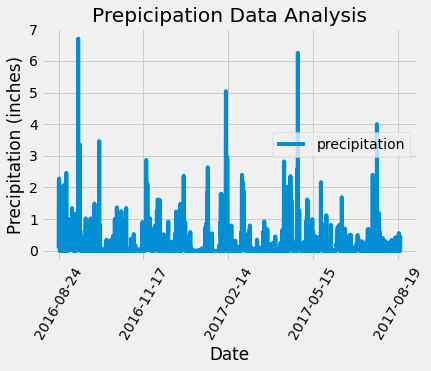

In [46]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot('date','precipitation')
plt.title('Prepicipation Data Analysis')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation = 60)
plt.savefig("Precipitation_data_analysis.png")

In [48]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

In [49]:
# Design a query to calculate the total number stations in the dataset
Stations = session.query(Station).count()
Stations

9

In [52]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Active_Stations = (session.query(Measurement.station, func.count(Measurement.station)).\
                   group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())
Most_Active = Active_Stations[0][0]

print("The station with the highest number of obsevations was " + Most_Active + " with " + str(Active_Stations[0][1]) + " observations.")
print("The following stations and observation counts are listed in descending order.")
for station, observation in Active_Stations:
    print("Station " + station + " had " + str(observation) + " observations.")

The station with the highest number of obsevations was USC00519281 with 2772 observations.
The following stations and observation counts are listed in descending order.
Station USC00519281 had 2772 observations.
Station USC00519397 had 2724 observations.
Station USC00513117 had 2709 observations.
Station USC00519523 had 2669 observations.
Station USC00516128 had 2612 observations.
Station USC00514830 had 2202 observations.
Station USC00511918 had 1979 observations.
Station USC00517948 had 1372 observations.
Station USC00518838 had 511 observations.


In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == Most_Active).\
    filter(Measurement.date > latestyear).order_by(Measurement.date).all()
temp_df = pd.DataFrame(temp)
temp_df=temp_df.rename(columns={0:'station',1:'date',2:'tobs'})
temp_df.head()


station        date  tobs
0  USC00519281  2016-08-24  77.0
1  USC00519281  2016-08-25  80.0
2  USC00519281  2016-08-26  80.0
3  USC00519281  2016-08-27  75.0
4  USC00519281  2016-08-28  73.0

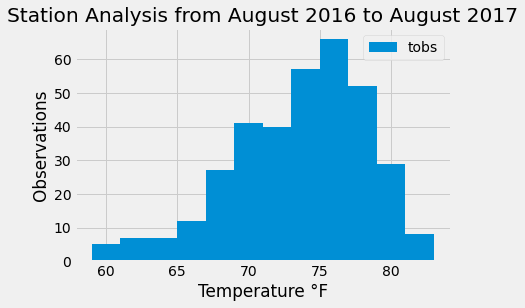

In [61]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df.set_index('date')
temp_df.plot.hist(bins = 12)
plt.title("Station Analysis from August 2016 to August 2017")
plt.xlabel("Temperature °F")
plt.ylabel("Observations")
plt.savefig("Station_data_analysis.png")

In [62]:
# Close Session
session.close()